In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [10]:
path = '/home/joann8512/NAS_189/home/LoopClassifier/temp.txt'

In [25]:
f = open(path, "r")
result = f.read()
result = result.replace('array(', '')
result = result.replace(')', '')
result = result.replace('\n', '')
result = result.replace(' ', '')
result = result.replace(',', ', ')
result = result.replace('dtype=float32, ', '')
result = result.replace('dtype=float32', '')


In [26]:
result

'[[0.01206766, 0.02096767, 0.11770686, 0.79318845, 0.14563762, 0.03467459], [0.22589613, 0.3402575, 0.02835181, 0.11932476, 0.7388899, 0.05436471], [0.18447675, 0.19260739, 0.08152635, 0.7377812, 0.24200223, 0.04251962], [0.5145796, 0.01782473, 0.0398405, 0.24172182, 0.22425051, 0.01967176], [8.3676964e-01, 8.5938759e-03, 4.8425348e-04, 3.8031305e-03, 8.6908925e-01, 1.2110554e-03], [0.618889, 0.48196176, 0.0936911, 0.40558553, 0.49019384, 0.0442468], [0.09885498, 0.15169442, 0.08388906, 0.58766544, 0.76239663, 0.08182688], [0.98931354, 0.13267604, 0.00640685, 0.00460791, 0.10304247, 0.00441359], [0.7256583, 0.03364505, 0.00776585, 0.03571277, 0.47161788, 0.08403079], [0.99369055, 0.01783868, 0.00626494, 0.00224263, 0.10097028, 0.0026816], [0.98113155, 0.38462073, 0.00542741, 0.01973284, 0.3450404, 0.00239286], [0.26530695, 0.05124323, 0.10846427, 0.4904252, 0.27030924, 0.14898805], [0.18416755, 0.18551937, 0.03998902, 0.09262952, 0.8027344, 0.06626727], [0.25157565, 0.14501137, 0.30134

In [40]:
gt = [[0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0], 
      [1, 1, 0, 1, 0, 0], [0, 0, 1, 1, 1, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], 
      [0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0], [0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0],  
      [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0], 
      [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], 
      [0, 0, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0],  
      [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], 
      [1, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0], 
      [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0],  
      [0, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1], 
      [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1]]

In [57]:
est = [[0.01206766, 0.02096767, 0.11770686, 0.79318845, 0.14563762, 0.03467459], 
       [0.22589613, 0.3402575, 0.02835181, 0.11932476, 0.7388899, 0.05436471], 
       [0.18447675, 0.19260739, 0.08152635, 0.7377812, 0.24200223, 0.04251962], 
       [0.5145796, 0.01782473, 0.0398405, 0.24172182, 0.22425051, 0.01967176], 
       [8.3676964e-01, 8.5938759e-03, 4.8425348e-04, 3.8031305e-03, 8.6908925e-01, 1.2110554e-03], 
       [0.618889, 0.48196176, 0.0936911, 0.40558553, 0.49019384, 0.0442468], 
       [0.09885498, 0.15169442, 0.08388906, 0.58766544, 0.76239663, 0.08182688], 
       [0.98931354, 0.13267604, 0.00640685, 0.00460791, 0.10304247, 0.00441359], 
       [0.7256583, 0.03364505, 0.00776585, 0.03571277, 0.47161788, 0.08403079], 
       [0.99369055, 0.01783868, 0.00626494, 0.00224263, 0.10097028, 0.0026816], 
       [0.98113155, 0.38462073, 0.00542741, 0.01973284, 0.3450404, 0.00239286], 
       [0.26530695, 0.05124323, 0.10846427, 0.4904252, 0.27030924, 0.14898805], 
       [0.18416755, 0.18551937, 0.03998902, 0.09262952, 0.8027344, 0.06626727], 
       [0.25157565, 0.14501137, 0.30134013, 0.71005994, 0.22415276, 0.03320215], [0.91653895, 0.06717814, 0.0260953, 0.06923144, 0.30533072, 0.00698861], [0.17876618, 0.23450749, 0.03278742, 0.05131474, 0.6878508, 0.08790137], [0.1728913, 0.25220057, 0.03690755, 0.05510968, 0.65470177, 0.03871452], [0.07864013, 0.25329983, 0.04903824, 0.1793489, 0.8332619, 0.03375373], [0.9933831, 0.03514197, 0.00356736, 0.02481803, 0.03036058, 0.002935], [0.82734627, 0.03934509, 0.00319303, 0.00809532, 0.4742636, 0.01550931], [0.90469706, 0.05995427, 0.01475019, 0.14678222, 0.41618037, 0.01120939], [0.16919512, 0.14727144, 0.05747288, 0.4532365, 0.5933368, 0.09703147], [0.05557508, 0.03791269, 0.6836252, 0.61562, 0.05221009, 0.02555542], [0.04875888, 0.1583145, 0.26417845, 0.6906719, 0.18125243, 0.05961734], [0.9649608, 0.5414284, 0.06651244, 0.66852367, 0.17160599, 0.00315071], [0.11462646, 0.4065389, 0.16235533, 0.64154845, 0.45228785, 0.05044044], [0.99646604, 0.05455653, 0.00153839, 0.01312503, 0.05276172, 0.00314782], [0.828359, 0.03716897, 0.03317993, 0.03487794, 0.67815274, 0.01842554], [0.9826141, 0.10908361, 0.0052549, 0.00390382, 0.10252152, 0.00673043], [0.3190432, 0.01816201, 0.01075574, 0.03306928, 0.8885618, 0.0256485], [0.96037924, 0.05457024, 0.0129353, 0.00966175, 0.12755078, 0.0161226], [0.14407043, 0.10751848, 0.2689447, 0.8055338, 0.15237184, 0.04676345], [0.23882985, 0.32386136, 0.06226576, 0.5874941, 0.14029476, 0.0161586], [0.13400589, 0.22459523, 0.24505381, 0.38441217, 0.43674815, 0.1472354], [0.98355925, 0.34955862, 0.01109074, 0.01548501, 0.17910358, 0.00538055], [0.7869414, 0.77401054, 0.04184483, 0.06543606, 0.31748062, 0.01454489], [9.9284601e-01, 3.0099696e-01, 2.7295470e-03, 1.2647508e-02, 2.7423960e-01, 8.4033184e-04], [0.02880661, 0.04116188, 0.06721438, 0.8630034, 0.12965377, 0.01931861], [0.9569887, 0.09097022, 0.01362026, 0.02986699, 0.31575602, 0.01013619], [0.04340583, 0.03462212, 0.5947065, 0.6275108, 0.12882952, 0.03273556], [0.95454234, 0.5297166, 0.01236466, 0.02555444, 0.08919838, 0.00498575], [0.281233, 0.13226947, 0.1344007, 0.17055443, 0.76080143, 0.07696369], [0.03151986, 0.49410692, 0.18548827, 0.33035597, 0.21832444, 0.04775307], [0.33261725, 0.04913452, 0.12230247, 0.1804815, 0.77987057, 0.05979408], [0.04918873, 0.13248843, 0.05711758, 0.78517777, 0.39635366, 0.01804059], [0.06561249, 0.14933307, 0.13872446, 0.9063602, 0.11473389, 0.00464325], [0.0427098, 0.01621173, 0.06569581, 0.9275802, 0.06420834, 0.00774431], [0.03775259, 0.03460218, 0.48500988, 0.6857357, 0.04184661, 0.03056518], [0.9865083, 0.17804648, 0.00637432, 0.01022612, 0.08279221, 0.00563845], [0.21152073, 0.03802907, 0.01137824, 0.1329191, 0.8286188, 0.07665153], [0.0699674, 0.25717604, 0.02170176, 0.11735167, 0.68918645, 0.04250024], [0.41392174, 0.11075172, 0.05676222, 0.06093588, 0.66482717, 0.03050615], [0.92712706, 0.01564957, 0.01168746, 0.02115736, 0.12394457, 0.05170252], [0.07759022, 0.01727059, 0.03874383, 0.25638425, 0.8268771, 0.06576291]]

In [58]:
est2 = np.array(est)
for i in range(len(est2)):
    normalized = (est2[i]-min(est2[i]))/(max(est2[i])-min(est2[i]))
    est2[i] = normalized
print(gt[4])
print(est[4])
print(est2[4])

[0, 1, 0, 1, 0, 0]
[0.83676964, 0.0085938759, 0.00048425348, 0.0038031305, 0.86908925, 0.0012110554]
[9.62791361e-01 9.33637551e-03 0.00000000e+00 3.82092785e-03
 1.00000000e+00 8.36746188e-04]


In [53]:
for pred in est2:
    for i in range(len(pred)):
        if pred[i] >= 0.5:
            pred[i] = 1
        else:
            pred[i] = 0
            
print(est2)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1.

In [97]:
lst = [est2[0], est2[45]]
print(lst)

s = [sum(x) for x in zip(*lst)]
ans = [number/2 for number in s]
ans

[array([0.        , 0.0113939 , 0.13524054, 1.        , 0.17099783,
       0.02894166]), array([0.06761461, 0.16046035, 0.14869545, 1.        , 0.12209002,
       0.        ])]


[0.03380730505287718,
 0.08592712505433504,
 0.14196799793705558,
 1.0,
 0.14654392470796734,
 0.014470828512962762]

/home/joann8512/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


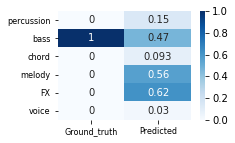

In [174]:
import seaborn as sns
import pandas as pd

#lst = [est2[3], est2[7], est2[8], est2[9], est2[14], est2[18], est2[20], est2[27], est2[28], est2[29], est2[30], est2[33], est2[34], est2[36], est2[38], est2[40], est2[51], est2[52]]   ###
lst = [est2[15], est2[32], est2[42], est2[44], est2[50]]
s = [sum(x) for x in zip(*lst)]
ans = [number/len(lst) for number in s]

mt = np.stack((gt[15], ans), axis = 0)   ###
df = pd.DataFrame({'Ground_truth': mt[0], "Predicted": mt[1]}, index=['percussion', 'bass', 'chord', 'melody', 'FX', 'voice'])
fig = plt.subplots(figsize=(3,2))
sns_plot = sns.heatmap(df, cmap="Blues", annot=True)
sns_plot.tick_params(labelsize=8)


fig = sns_plot.get_figure()
fig.show()
fig.savefig('/home/joann8512/NAS_189/home/LoopClassifier/tag_spec_show/error_analysis/bassOnly.png', dpi=300, bbox_inches='tight')   ###

/home/joann8512/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


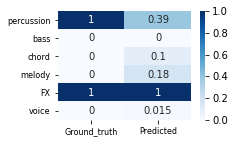

In [8]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
mt = [[1, 0, 0, 0, 1, 0], [0.39, 0.0, 0.1, 0.18, 1.0, 0.015]]
df = pd.DataFrame({'Ground_truth': mt[0], "Predicted": mt[1]}, index=['percussion', 'bass', 'chord', 'melody', 'FX', 'voice'])

fig = plt.subplots(figsize=(3,2))
sns_plot = sns.heatmap(df, cmap="Blues", annot=True)
sns_plot.tick_params(labelsize=8)


fig = sns_plot.get_figure()
fig.show()
fig.savefig('/home/joann8512/NAS_189/home/LoopClassifier/tag_spec_show/error_analysis/perc&FX.png', dpi=300, bbox_inches='tight')

In [142]:
lst

[array([0.27802073, 0.4389711 , 0.        , 0.12803388, 1.        ,
        0.03661014]),
 array([0.05614252, 0.27460145, 0.01911739, 0.18210592, 1.        ,
        0.        ]),
 array([0.20848995, 0.16757717, 0.        , 0.73855247, 1.        ,
        0.07382208]),
 array([1.        , 0.5596507 , 0.06587759, 0.69179245, 0.17514401,
        0.        ])]

In [205]:
import pandas as pd
from sklearn import preprocessing


data = pd.read_csv("/home/joann8512/NAS_189/home/LoopClassifier/audio_label2.csv") 
data = data.drop(['id'], axis=1)
data.columns = ['percussion', 'bass', 'chords', 'melody', 'FX', 'voice']
data

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1851,0.0,0.0,0.0,0.0,1.0,0.0
1852,0.0,1.0,0.0,0.0,0.0,0.0
1853,1.0,0.0,0.0,0.0,0.0,0.0
1854,1.0,0.0,0.0,0.0,0.0,0.0


In [191]:
df_asint = data.astype(int)
df_asint

,percussion,bass,chords,melody,FX,voice
0,0,0,0,0,1,0
1,1,1,0,0,0,0
2,1,0,0,0,0,0
3,0,0,1,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1851,0,0,0,0,1,0
1852,0,1,0,0,0,0
1853,1,0,0,0,0,0
1854,1,0,0,0,0,0


In [214]:
coocc = df_asint.T.dot(df_asint)
min_max_scaler = preprocessing.MinMaxScaler()
#coocc
scaled = min_max_scaler.fit_transform(coocc)
df = pd.DataFrame(scaled, index=['percussion', 'bass', 'chords', 'melody', 'FX', 'voice'])
df.columns = ['percussion', 'bass', 'chords', 'melody', 'FX', 'voice']
df

,percussion,bass,chords,melody,FX,voice
percussion,1.000000,0.472131,0.263959,0.213415,0.271277,0.153846
bass,0.144309,1.000000,0.142132,0.189024,0.111702,0.000000
chords,0.050813,0.091803,1.000000,0.152439,0.049645,0.000000
melody,0.104675,0.304918,0.380711,1.000000,0.193262,0.000000
FX,0.153455,0.206557,0.142132,0.221545,1.000000,0.000000
voice,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


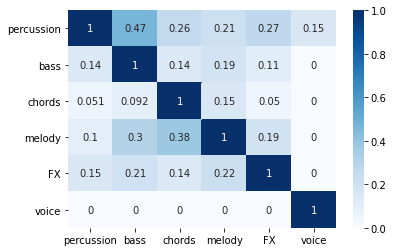

In [241]:
plot = sns.heatmap(df, cmap='Blues', annot=True)

In [242]:
fig = plot.get_figure()
fig.show()
fig.savefig('/home/joann8512/NAS_189/home/LoopClassifier/co_occur.png', dpi=300, bbox_inches='tight')   ###

/home/joann8512/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [227]:
data = pd.read_csv("/home/joann8512/NAS_189/home/LoopClassifier/full_data.csv") 
lst = data['binary']
#data = data.drop(['id'], axis=1)

In [240]:
add=0  # 1, 4, 7, 10, 13, 16
for x in lst:
    add+=int(x[16])
    
add

69

In [219]:
#data.columns = ['percussion', 'bass', 'chords', 'melody', 'FX', 'voice']
perc = data['percussion'].sum()
bass = data['bass'].sum()
chords = data['chords'].sum()
mel = data['melody'].sum()
fx = data['FX'].sum()
voice = data['voice'].sum()

print(perc)
print(bass)
print(chords)
print(mel)
print(fx)
print(voice)

986
305
197
492
564
13


In [222]:
1626, 493, 350, 603, 845, 69

[1, 2, 3, 3, 4, 5]